In [3]:
# non parametric minimal probability experiment

from matplotlib import colors, cm
import matplotlib.pyplot as plt


import numpy as np
import math
import time
import utpy.utils
import utpy.vis
import flatpy

In [4]:
#sample histogram with two bins
def sampleHistogram(a1,b1,c1,numSamples,threshold):

    # True computation using plain Monte Carlo    
    sampleHistogram = np.zeros((1,numSamples))        
    for k in range(numSamples):
        s = np.random.uniform(0,1,1)
        if (s < threshold):
            sampleHistogram[0,k] = np.random.uniform(a1,b1,1)
        else:
            sampleHistogram[0,k] = np.random.uniform(b1,c1,1)
        
    return sampleHistogram

In [5]:
# MC sampling
# make sure a<b for each interval below

#X1 (one bin with width w=2)
a1 = 3
b1 = 5

#X2 (two bins each with width k=1)
a2 = 2
b2 = 3
c2 = 4

#X3
a3 = 4
b3 = 5
c3 = 6

#X4 
a4 = 4
b4 = 5

#X5
a5 = 4
b5 = 5

threshold = 0.4

# histogram representation
numBins1 = 1
numBins2 = 2
numBins3 = 2
numBins4 = 1
numBins5 = 1

hist1 = np.zeros((numBins1,))
bins1 = np.zeros((numBins1+1,))
hist1[0] = 1
bins1[0] = a1
bins1[1] = b1
print(hist1)
print(bins1)


hist2 = np.zeros((numBins2,))
bins2 = np.zeros((numBins2+1,))
hist2[0] = threshold
hist2[1] = 1-threshold
bins2[0] = a2
bins2[1] = b2
bins2[2] = c2

hist3 = np.zeros((numBins3,))
bins3 = np.zeros((numBins3+1,))
hist3[0] = threshold
hist3[1] = 1-threshold
bins3[0] = a3
bins3[1] = b3
bins3[2] = c3

hist4 = np.zeros((numBins4,))
bins4 = np.zeros((numBins4+1,))
hist4[0] = 1
bins4[0] = a4
bins4[1] = b4

hist5 = np.zeros((numBins5,))
bins5 = np.zeros((numBins5+1,))
hist5[0] = 1
bins5[0] = a5
bins5[1] = b5

numSamples = 800000
numMinima = 0

subpart1 = 0
subpart2 = 0

x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = sampleHistogram(a2,b2,c2,numSamples,threshold)
x3Samples = sampleHistogram(a3,b3,c3,numSamples,threshold)
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))
    
for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        numMinima = numMinima + 1
        
print('x1 minimum probability (truth)', numMinima/numSamples)  


[1.]
[3. 5.]
x1 minimum probability (truth) 0.14945


In [6]:
# Computation in parts (Monte Carlo)

subpart1=0
subpart2=0
subpart3=0
subpart4=0

# Part 1
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=a2, high=b2, size=(1,numSamples))
x3Samples = np.random.uniform(low=a3, high=b3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart1 = subpart1 + 1
subpart1Prob = subpart1/numSamples      
factor1= threshold*threshold

# Part 2
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=b2, high=c2, size=(1,numSamples))
x3Samples = np.random.uniform(low=a3, high=b3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart2 = subpart2 + 1
subpart2Prob = subpart2/numSamples
factor2= (1-threshold)*threshold

# Part 3
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=a2, high=b2, size=(1,numSamples))
x3Samples = np.random.uniform(low=b3, high=c3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart3 = subpart3 + 1
subpart3Prob = subpart3/numSamples      
factor3= threshold*(1-threshold)

# Part 4
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=b2, high=c2, size=(1,numSamples))
x3Samples = np.random.uniform(low=b3, high=c3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart4 = subpart4 + 1
subpart4Prob = subpart4/numSamples
factor4= (1-threshold)*(1-threshold)


print("probability using parts", factor1*subpart1Prob + factor2*subpart2Prob + factor3*subpart3Prob + factor4*subpart4Prob)


probability using parts 0.14989185


In [7]:
def computeIntegral(l=None, h=None, h2=None, h3=None, h4=None, h5=None, n1=1, n2=1, n3=1, n4=1, n5=1):
    
    intUp = 0
    intDown = 0
    
    normalizingFactor = 1/(n1*n2*n3*n4*n5)
    
    
    if (l is not None) and (h is not None) and  (h2 is None) and (h3 is None) and (h4 is None) and (h5 is None):
    
        intUp = normalizingFactor*h
        intDown = normalizingFactor*l
        
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is None) and (h4 is None) and (h5 is None):
        
        # Double check this
        intUp = normalizingFactor* (h2*h - h*h/2)
        intDown = normalizingFactor* (h2*l - l*l/2)
     
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is None) and (h5 is None):
    
        intUp = normalizingFactor * (h3*h2*h - (h3+h2)*h*h/2 + h*h*h/3)
        intDown = normalizingFactor * (h3*h2*l - (h3+h2)*l*l/2 + l*l*l/3)
    
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is None):
    
        intUp = normalizingFactor * (h4*h3*h2*h - (h2*h3+h2*h4+h3*h4)*(h**2/2) + (h2+h3+h4)*(h**3/3) - h**4/4)
        intDown = normalizingFactor * (h4*h3*h2*l - (h2*h3+h2*h4+h3*h4)*(l**2/2) + (h2+h3+h4)*(l**3/3) - l**4/4)
        
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is not None):
        
        intUp = normalizingFactor * (h5*h4*h3*h2*h - (h2*h3*h4+h2*h3*h5+h2*h4*h5+h3*h4*h5)*(h**2/2) + (h2*h3+h2*h4+h2*h5+h3*h4+h3*h5+h4*h5)*(h**3/3) - (h2+h3+h4+h5)*(h**4/4) + h**5/5)
        intDown = normalizingFactor * (h5*h4*h3*h2*l - (h2*h3*h4+h2*h3*h5+h2*h4*h5+h3*h4*h5)*(l**2/2) + (h2*h3+h2*h4+h2*h5+h3*h4+h3*h5+h4*h5)*(l**3/3) - (h2+h3+h4+h5)*(l**4/4) + l**5/5)
        
    return (intUp-intDown)

def superOptimizedCase(indexOfa1,x1Limits, sortedI, w1):
    
    minimaProb = 0
    
    highLimits = []
    intervalWidths = []
    
    # The first 0,None are dummy for ease of indexing in next for loop
    upLimits = [0,None,None,None,None,None]
    normalizerWidths = [0, w1, 1,1,1,1]
    
    # Depending on how many intervals started before a1, it will properly set upper integral limits and normalizers
    # for the starting integral
    for k in range(indexOfa1):
        interval = sortedI[k]
        upLimits[k+2] = interval[1]
        normalizerWidths[k+2] = interval[1]-interval[0]
        
    minimaProb = minimaProb + computeIntegral(l=x1Limits[indexOfa1],h=x1Limits[indexOfa1+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerWidths[1],n2=normalizerWidths[2],n3=normalizerWidths[3],n4=normalizerWidths[4],n5=normalizerWidths[5])
        
    # Start piecewise integration where limits of each piece for X1 random variable are in xLimits array
    # Note that limits always are at start points of intervals fortunately, except the last one which is minimum
    # among all b's
    for j in range(indexOfa1+1,len(x1Limits)-1):
        
        interval = sortedI[j]
        upLimits[j+1] = interval[1]
        normalizerWidths[j+1] = interval[1]-interval[0]
        
        minimaProb = minimaProb + computeIntegral(l=x1Limits[j],h=x1Limits[j+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerWidths[1],n2=normalizerWidths[2],n3=normalizerWidths[3],n4=normalizerWidths[4],n5=normalizerWidths[5])
        
    return minimaProb

# Compute analytical local minimum probability
def superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5):
    
    # Go through list of intervals sorted by their starting points, and find interval from end of sorted list which 
    # contains bMin
    I1 = [a1,b1]
    I2 = [a2,b2]
    I3 = [a3,b3]
    I4 = [a4,b4]
    I5 = [a5,b5]

    w1 = b1-a1
    w2 = b2-a2
    w3 = b3-a3
    w4 = b4-a4
    w5 = b5-a5

    bMin = min([b1,b2,b3,b4,b5])
    #print('bMin:',bMin)

    # if bMin is smaller than a1, then return minima probability to be 0

    if (bMin <= a1):
        minimaProb = 0

    else:
        
        I = [I1,I2,I3,I4,I5]
        #print(I)
    
        # get interval order based on starting points
        startPointList = [a1, a2, a3, a4, a5]
        #print(startPointList)
        order = np.argsort(startPointList)
        #print(order)    

        sortedI = [I[order[0]],I[order[1]], I[order[2]], I[order[3]], I[order[4]]]
        #print('sortedI',sortedI)

        numIntervals = 4

        # Find the interval from end in a list sorted by starting points which contains bMin
        for i in reversed(range(numIntervals+1)):
            intervalFromEnd = sortedI[i]
            if (bMin >= intervalFromEnd[0]) and (bMin <= intervalFromEnd[1]):
                break;

        endInterval = i
        #print('endInterval', endInterval)

        # Sorted starts appended by bMin
        x1Limits = []

        for i in range(endInterval+1):
            interval = sortedI[i]    
            x1Limits.append(interval[0])
    
        x1Limits.append(bMin)
        #print(x1Limits)

        # Identify where start of interval of interest lies in x1Limits array. We start integrating from that point onward
        for i in range(len(x1Limits)):
    
            if x1Limits[i] == a1:  
                break
        
        indexOfa1 = i
        #print('indexOfa1',indexOfa1)

        minimaProb = superOptimizedCase(indexOfa1,x1Limits, sortedI, w1)
    
    #print('Minima probability', minimaProb)
    return minimaProb  
# Computation in parts (Closed form)

subpart1=0
subpart2=0
subpart3=0
subpart4=0

# Part 1
subpart1Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5)
factor1= threshold*threshold

# Part 2
subpart2Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,b2,c2,a3,b3,a4,b4,a5,b5)
factor2= (1-threshold)*threshold

# Part 3
subpart3Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,b3,c3,a4,b4,a5,b5)
factor3= threshold*(1-threshold)

# Part 4
subpart4Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,b2,c2,b3,c3,a4,b4,a5,b5)
factor4= (1-threshold)*(1-threshold)


print("probability using parts", factor1*subpart1Prob + factor2*subpart2Prob + factor3*subpart3Prob + factor4*subpart4Prob)


probability using parts 0.15


In [8]:
# Minmum Probability computation for a single pixel using histogram approach (Monte Carlo)
# If there are n bins each at point of interest and 4 local neighbors, computational time complexity
# is  n^5*(numberofMonteCarlo samples)

# Pass histogram and bin_edges information computed using numpy histogram at the point of interest and each of local neighbors
def histogramMonteCarlo(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5, numSamples):

    minimumProb = 0
    numBins1 = len(hist1)
    numBins2 = len(hist2)
    numBins3 = len(hist3)
    numBins4 = len(hist4)
    numBins5 = len(hist5)
    
    # Make sure sum of hist is 1
    hist1 = hist1/np.sum(hist1)
    hist2 = hist2/np.sum(hist2)
    hist3 = hist3/np.sum(hist3)
    hist4 = hist4/np.sum(hist4)
    hist5 = hist5/np.sum(hist5)
    
    for i in range(numBins1):
        for j in range (numBins2):
            for k in range (numBins3):
                for l in range(numBins4):
                    for m in range(numBins5):
                    
                        # end points of bins
                        a1 = bins1[i]
                        b1 = bins1[i+1]
                        a2 = bins2[j]
                        b2 = bins2[j+1]
                        a3 = bins3[k]
                        b3 = bins3[k+1]
                        a4 = bins4[l]
                        b4 = bins4[l+1]
                        a5 = bins5[m]
                        b5 = bins5[m+1]
                    
                        # Probabilitis of bins
                        p1 = hist1[i]
                        p2 = hist2[j]
                        p3 = hist3[k]
                        p4 = hist4[l]
                        p5 = hist5[m]
                    
                        # Probability of the bin configuration
                        p = p1*p2*p3*p4*p5
                    
                        x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
                        x2Samples = np.random.uniform(low=a2, high=b2, size=(1,numSamples))
                        x3Samples = np.random.uniform(low=a3, high=b3, size=(1,numSamples))
                        x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
                        x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

                        subpart = 0
                    
                        for n in range(numSamples):
                            if (x1Samples[0,n] < x2Samples[0,n]) and (x1Samples[0,n] < x3Samples[0,n]) and (x1Samples[0,n] < x4Samples[0,n]) and (x1Samples[0,n] < x5Samples[0,n]):
                                subpart = subpart + 1
                    
                        subpartProb = subpart/numSamples 
                    
                        minimumProb = minimumProb + p*subpartProb
                    
    return minimumProb
    print("probability using parts (Monte Carlo)", minimumProb) 

In [9]:
# Minmum Probability computation for a single pixel using histogram approach (Closed form)
# If there are n bins each at point of interest and 4 local neighbors, computational time complexity
# is  n^5

def histogramClosedForm(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5):

    minimumProb = 0
    numBins1 = len(hist1)
    numBins2 = len(hist2)
    numBins3 = len(hist3)
    numBins4 = len(hist4)
    numBins5 = len(hist5)
    
    # Make sure sum of hist is 1
    hist1 = hist1/np.sum(hist1)
    hist2 = hist2/np.sum(hist2)
    hist3 = hist3/np.sum(hist3)
    hist4 = hist4/np.sum(hist4)
    hist5 = hist5/np.sum(hist5)

    for i in range(numBins1):
        for j in range (numBins2):
            for k in range (numBins3):
                for l in range(numBins4):
                    for m in range(numBins5):
                    
                        # end points of bins
                        a1 = bins1[i]
                        b1 = bins1[i+1]
                        a2 = bins2[j]
                        b2 = bins2[j+1]
                        a3 = bins3[k]
                        b3 = bins3[k+1]
                        a4 = bins4[l]
                        b4 = bins4[l+1]
                        a5 = bins5[m]
                        b5 = bins5[m+1]
                    
                        # Probabilitis of bins
                        p1 = hist1[i]
                        p2 = hist2[j]
                        p3 = hist3[k]
                        p4 = hist4[l]
                        p5 = hist5[m]
                    
                        # Probability of the bin configuration
                        p = p1*p2*p3*p4*p5
                    
                        minimumProb = minimumProb + p*superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5)
                    
    return minimumProb
    print("probability using parts (closed form)", minimumProb)      
                    

In [10]:
minProbMC = histogramMonteCarlo(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5, numSamples)
minProbClosed = histogramClosedForm(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5)
print(minProbMC)
print(minProbClosed)

0.15001140000000002
0.15


In [11]:
# define normalized 2D gaussian
def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

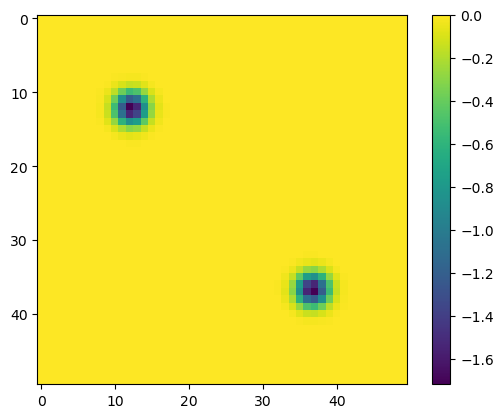

In [12]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
z1 = gaus2d(x, y, 2.5, 2.5, 0.3,0.3)
z2 = gaus2d(x, y, -2.5, -2.5, 0.3,0.3)
truthDataset = -(z1+z2)
img = plt.imshow(truthDataset)
plt.colorbar(img)

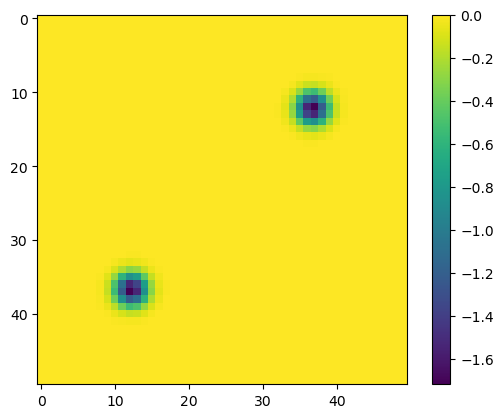

In [13]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
z1 = gaus2d(x, y, -2.5, 2.5, 0.3, 0.3)
z2 = gaus2d(x, y, 2.5, -2.5, 0.3, 0.3)
rotatedOutlierDataset = -(z1+z2)
img = plt.imshow(rotatedOutlierDataset)
plt.colorbar(img)

In [14]:
def add_Gaussian_noise(field, noise_level, numMembers):
    h,w = field.shape
    ensemble = np.zeros((h,w,numMembers))
    
    for i in range(numMembers):
        epsilon = np.random.normal(0,noise_level,[h,w])
        ensemble[:,:,i] = field + epsilon
        
    return ensemble

(50, 50, 40)
(50, 50, 50)


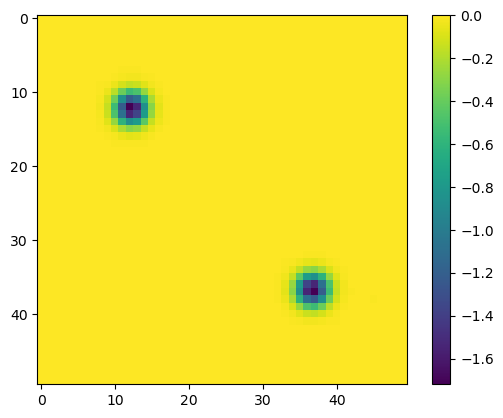

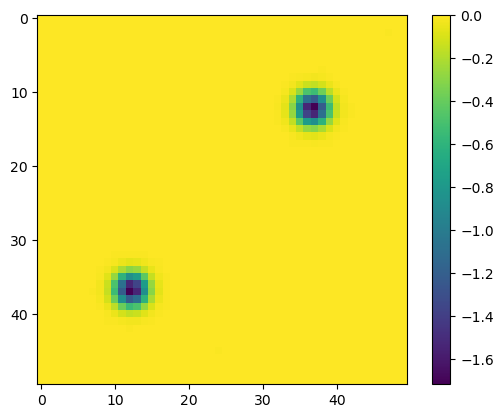

In [15]:
noise_level = 0.001

truthEnsembleDataset = add_Gaussian_noise(truthDataset,noise_level,40)
plt.figure()
img = plt.imshow(truthEnsembleDataset[:,:,0])
plt.colorbar(img)
print(truthEnsembleDataset.shape)

rotatedOutlierEnsembleDataset = add_Gaussian_noise(rotatedOutlierDataset,noise_level,10)
plt.figure()
img = plt.imshow(rotatedOutlierEnsembleDataset[:,:,0])
plt.colorbar(img)

ensemble = np.concatenate((truthEnsembleDataset, rotatedOutlierEnsembleDataset), axis=2)


print(ensemble.shape)

In [16]:
#foo = flatpy.nD.available_functions["ackley"]
#fractional_noise_level=20
#persistence = 0.665
#n_clusters = 9
#count = 50
#noise_level = 0.01*persistence*fractional_noise_level
#noise_model = "uniform"
#ground_truth, ensemble = utpy.utils.generate_ensemble(foo, noise_level, count, noise_model)
#ensemble = ensemble
#ground_truth = ground_truth
#print(np.min(ground_truth))
#img = plt.imshow(ensemble[:,:,10])
#plt.colorbar(img)

In [17]:
# Monte Carlo Sampling to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def MClocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble, numSamples):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i-1,j]
                x3max = maximumGrid[i-1,j]
                x4min = minimumGrid[i,j+1]
                x4max = maximumGrid[i,j+1]
                x5min = minimumGrid[i,j-1]
                x5max = maximumGrid[i,j-1]
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]
                         
                x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
                x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
                x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
                x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))
                x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                for k in range(numSamples):    
                    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                        numTimesLocalMinimum = numTimesLocalMinimum + 1                   
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
                # Estimate local maximum probability
                localMinimumProb = numTimesLocalMinimum/numSamples
                minimaProbabilities[i,j] = localMinimumProb
                
    return minimaProbabilities

In [18]:
# Monte Carlo Sampling to compute local minima probabilities for ensembles using histograms
# TODO: Handle voxel probabilities on domain boundaries
def MClocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numSamples, numBinsPerHistogram):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                
                #Derive histogram for each vertex
                numBins = numBinsPerHistogram
                hist1, bin_edges1 = np.histogram(ensemble[i,j,:], bins=numBins)
                hist2, bin_edges2 = np.histogram(ensemble[i+1,j,:], bins=numBins)
                hist3, bin_edges3 = np.histogram(ensemble[i-1,j,:], bins=numBins)
                hist4, bin_edges4 = np.histogram(ensemble[i,j+1,:], bins=numBins)
                hist5, bin_edges5 = np.histogram(ensemble[i,j-1,:], bins=numBins)
                
                #print("hist1:",hist1)
                #print("bin_edges1:", bin_edges1)
                
                localMinimumProb = histogramMonteCarlo(hist1, hist2, hist3, hist4, hist5, bin_edges1, bin_edges2, bin_edges3, bin_edges4, bin_edges5, numSamples)
                minimaProbabilities[i,j] = localMinimumProb 
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
    return minimaProbabilities

In [19]:
# Monte Carlo Sampling to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def MClocalMinimaProbabilityIndependentGaussianWithBoundaryNotHandled(ensemble, numSamples):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                #Estimate mean and covariance matrices from samples
                m1 = np.mean(ensemble[i,j,:])
                m2 = np.mean(ensemble[i+1,j,:])   
                m3 = np.mean(ensemble[i-1,j,:])
                m4 = np.mean(ensemble[i,j+1,:]) 
                m5 = np.mean(ensemble[i,j-1,:]) 
                std1 = np.std(ensemble[i,j,:])
                std2 = np.std(ensemble[i+1,j,:])   
                std3 = np.std(ensemble[i-1,j,:])
                std4 = np.std(ensemble[i,j+1,:]) 
                std5 = np.std(ensemble[i,j-1,:]) 
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]
                         
                x1Samples = np.random.normal(m1,std1,[1,numSamples])
                x2Samples = np.random.normal(m2,std2,[1,numSamples])
                x3Samples = np.random.normal(m3,std3,[1,numSamples])
                x4Samples = np.random.normal(m4,std4,[1,numSamples])
                x5Samples = np.random.normal(m5,std5,[1,numSamples])
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                for k in range(numSamples):    
                    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                        numTimesLocalMinimum = numTimesLocalMinimum + 1                   
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
                # Estimate local maximum probability
                localMinimumProb = numTimesLocalMinimum/numSamples
                minimaProbabilities[i,j] = localMinimumProb
                
    return minimaProbabilities

In [20]:
# Analytical way to compute local minima probabilities for ensembles
# TODO: Handle voxel probabilities on domain boundaries
def anlyticalLocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    numSamples = 2000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                #Estimate mean and covariance matrices from samples
                x1min = minimumGrid[i,j]
                x1max = maximumGrid[i,j]
                x2min = minimumGrid[i+1,j]
                x2max = maximumGrid[i+1,j]
                x3min = minimumGrid[i-1,j]
                x3max = maximumGrid[i-1,j]
                x4min = minimumGrid[i,j+1]
                x4max = maximumGrid[i,j+1]
                x5min = minimumGrid[i,j-1]
                x5max = maximumGrid[i,j-1]
                #x6min = minimumGrid[i+1,j-1]
                #x6max = maximumGrid[i+1,j-1]
                #x7min = minimumGrid[i+1,j+1]
                #x7max = maximumGrid[i+1,j+1]
                #x8min = minimumGrid[i-1,j-1]
                #x8max = maximumGrid[i-1,j-1]
                #x9min = minimumGrid[i-1,j+1]
                #x9max = maximumGrid[i-1,j+1]
                
                #if (i==8) and (j==5):
                #    print('x1min',x1min)
                #    print('x1max',x1max)
                #    print('x2min',x2min)
                #    print('x2max',x2max)
                #    print('x3min',x3min)
                #    print('x3max',x3max)
                #    print('x4min',x4min)
                #    print('x4max',x4max)
                #    print('x5min',x5min)
                #    print('x5max',x5max)
                
                #localMinimumProb = anlyticalLocalMinimumProbabilityComputation(x1min,x1max,x2min,x2max,x3min,x3max,x4min,x4max,x5min,x5max)
                localMinimumProb = superOptimizedAnlyticalLocalMinimumProbabilityComputation(x1min,x1max,x2min,x2max,x3min,x3max,x4min,x4max,x5min,x5max)
                minimaProbabilities[i,j] = localMinimumProb       
                    
                    
                #x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
                #x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
                #x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
                #x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))
                #x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
                #x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                #x7Samples = np.random.uniform(low=x7min, high=x7max, size=(1,numSamples))
                #x8Samples = np.random.uniform(low=x8min, high=x8max, size=(1,numSamples))
                #x9Samples = np.random.uniform(low=x9min, high=x9max, size=(1,numSamples))
            
                #for k in range(numSamples):    
                #    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):    
                #        numTimesLocalMinimum = numTimesLocalMinimum + 1                   
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
            # Estimate local maximum probability
            #localMinimumProb = numTimesLocalMinimum/numSamples
                
    return minimaProbabilities

In [27]:
# Analytically compute local minima probabilities for ensembles using histograms
# TODO: Handle voxel probabilities on domain boundaries
def analyticalLocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numBinsPerHistogram):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                
                #Derive histogram for each vertex
                numBins = numBinsPerHistogram
                hist1, bin_edges1 = np.histogram(ensemble[i,j,:], bins=numBins)
                hist2, bin_edges2 = np.histogram(ensemble[i+1,j,:], bins=numBins)
                hist3, bin_edges3 = np.histogram(ensemble[i-1,j,:], bins=numBins)
                hist4, bin_edges4 = np.histogram(ensemble[i,j+1,:], bins=numBins)
                hist5, bin_edges5 = np.histogram(ensemble[i,j-1,:], bins=numBins)
                
                if i == 2 and j <=3:
                    print("debug hist i j",i,j)
                    print("debug ens:", ensemble[i,j,:])
                    print("hist1:",hist1)
                    print("bin_edges1:",bin_edges1)
                #print("bin_edges1:", bin_edges1)
                
                localMinimumProb = histogramClosedForm(hist1, hist2, hist3, hist4, hist5, bin_edges1, bin_edges2, bin_edges3, bin_edges4, bin_edges5)
                minimaProbabilities[i,j] = localMinimumProb 
            
            #elif (i==0 and j==0) or (i== h-1 and j==0) or (i== 0 and j==w-1) or (i== h-1 and j==w-1):
                
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    # Corner vertices    
            #    if i==0 and j==0:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i+1
            #        temp3Y = j+1
            #    if i== h-1 and j==0:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j+1
            #    if i== 0 and j==w-1:
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j-1    
            #    if i== h-1 and j==w-1:
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i
            #        temp2Y = j-1
            #        temp3X = i-1
            #        temp3Y = j-1        
                
            #    #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]  
                    
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
            
            #elif (i==0) or (j==0) or (i==h-1) or (j==w-1):
            #    temp1X = 0
            #    temp1Y = 0
            #    temp2X = 0
            #    temp2Y = 0
            #    temp3X = 0
            #    temp3Y = 0
            #    temp4X = 0
            #    temp4Y = 0
            #    temp5X = 0
            #    temp5Y = 0
                
            #    if (i==0):
            #        temp1X = i
            #        temp1Y = j-1
            #        temp2X = i+1
            #        temp2Y = j-1
            #        temp3X = i+1
            #        temp3Y = j
            #        temp4X = i+1
            #        temp4Y = j+1
            #        temp5X = i
            #        temp5Y = j+1   
            #    elif (j==0):
            #        temp1X = i+1
            #        temp1Y = j
            #        temp2X = i+1
            #        temp2Y = j+1
            #        temp3X = i
            #        temp3Y = j+1
            #        temp4X = i-1
            #        temp4Y = j+1
            #        temp5X = i-1
            #        temp5Y = j        
            #    elif (i == h-1):
            #        temp1X = i
            #        temp1Y = j+1
            #        temp2X = i-1
            #        temp2Y = j+1
            #        temp3X = i-1
            #        temp3Y = j
            #        temp4X = i-1
            #        temp4Y = j-1
            #        temp5X = i
            #        temp5Y = j-1   
            #    elif (j == w-1):
            #        temp1X = i-1
            #        temp1Y = j
            #        temp2X = i-1
            #        temp2Y = j-1
            #        temp3X = i
            #        temp3Y = j-1
            #        temp4X = i+1
            #        temp4Y = j-1
            #        temp5X = i+1
            #        temp5Y = j       
                    
                #Estimate mean and covariance matrices from samples
            #    x1min = minimumGrid[i,j]
            #    x1max = maximumGrid[i,j]
            #    x2min = minimumGrid[temp1X,temp1Y]
            #    x2max = maximumGrid[temp1X,temp1Y]
            #    x3min = minimumGrid[temp2X,temp2Y]
            #    x3max = maximumGrid[temp2X,temp2Y]
            #    x4min = minimumGrid[temp3X,temp3Y]
            #    x4max = maximumGrid[temp3X,temp3Y]     
            #    x5min = minimumGrid[temp4X,temp4Y]
            #    x5max = maximumGrid[temp4X,temp4Y]        
            #    x6min = minimumGrid[temp5X,temp5Y]
            #    x6max = maximumGrid[temp5X,temp5Y]    
                
            #    x1Samples = np.random.uniform(low=x1min, high=x1max, size=(1,numSamples))
            #    x2Samples = np.random.uniform(low=x2min, high=x2max, size=(1,numSamples))
            #    x3Samples = np.random.uniform(low=x3min, high=x3max, size=(1,numSamples))
            #    x4Samples = np.random.uniform(low=x4min, high=x4max, size=(1,numSamples))    
            #    x5Samples = np.random.uniform(low=x5min, high=x5max, size=(1,numSamples))
            #    x6Samples = np.random.uniform(low=x6min, high=x6max, size=(1,numSamples))
                
            #    for k in range(numSamples):    
            #        if (x1Samples[0,k] > x2Samples[0,k]) and (x1Samples[0,k] > x3Samples[0,k]) and (x1Samples[0,k] > x4Samples[0,k]) and (x1Samples[0,k] > x5Samples[0,k]) and (x1Samples[0,k] > x6Samples[0,k]) :    
            #            numTimesLocalMaximum = numTimesLocalMaximum + 1   
                
    return minimaProbabilities

Time: 192.55532717704773


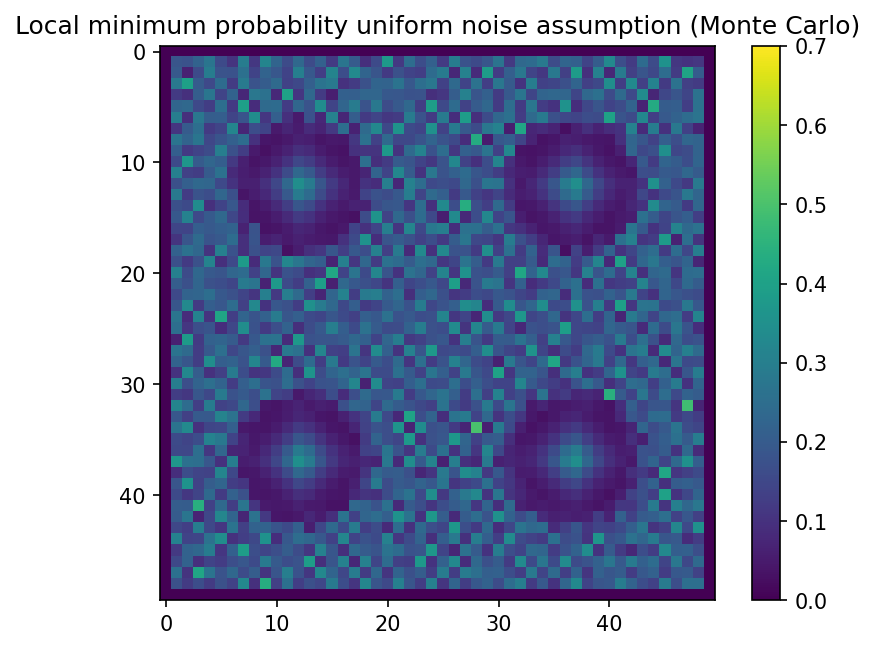

In [22]:
#Visualize local minima probabilities :  Monte Carlo, uniform noise 

numSamples = 156250
start = time.time()
uniformLocalMinimumProbabilitiesMonteCarlo = MClocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble, numSamples)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability uniform noise assumption (Monte Carlo)')
img2 = plt.imshow(uniformLocalMinimumProbabilitiesMonteCarlo, vmin=0, vmax=0.7)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)

Time: 218.98055601119995


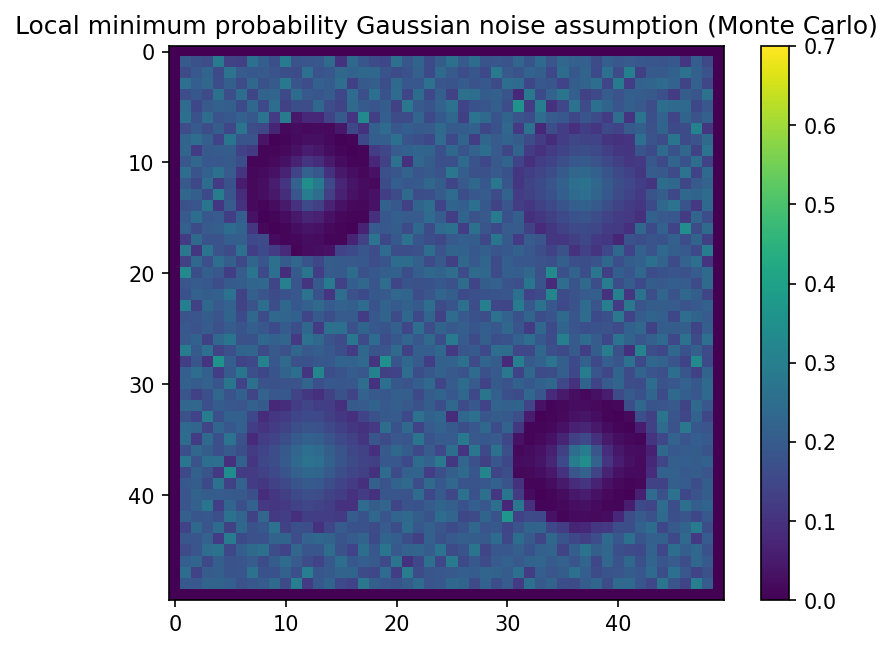

In [23]:
#Visualize local minima probabilities :  Monte Carlo, Gaussian noise

numSamples = 156250
start = time.time()
gaussianLocalMinimumProbabilitiesMonteCarlo = MClocalMinimaProbabilityIndependentGaussianWithBoundaryNotHandled(ensemble, numSamples)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability Gaussian noise assumption (Monte Carlo)')
img2 = plt.imshow(gaussianLocalMinimumProbabilitiesMonteCarlo, vmin=0, vmax=0.7)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)

Time: 272.58417797088623


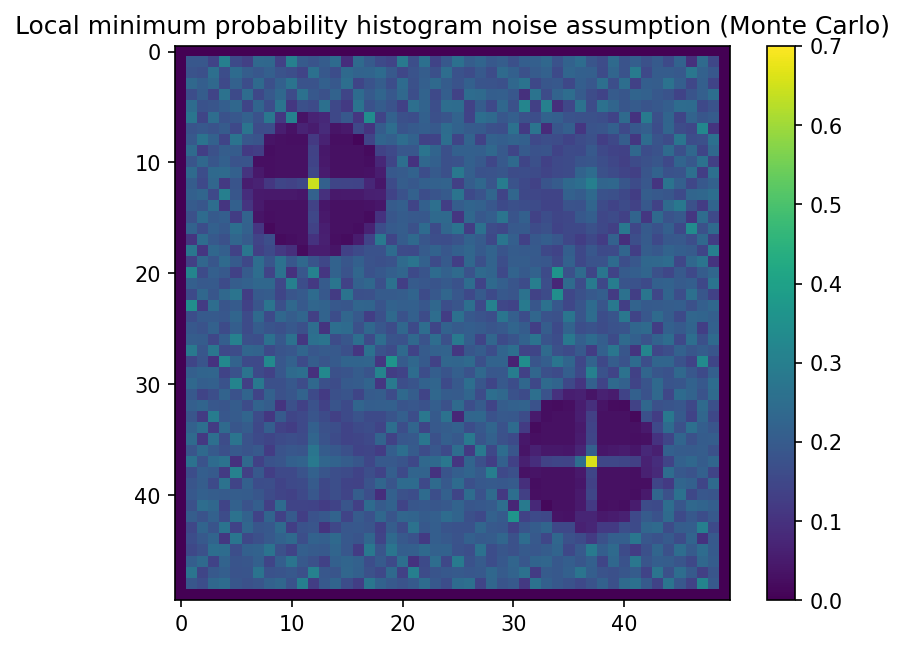

In [24]:
#Visualize local minima probabilities :  Monte Carlo, Histogram noise

numSamples = 50
start = time.time()
numBinsPerHistogram = 5
histogramLocalMinimumProbabilitiesMonteCarlo = MClocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numSamples, numBinsPerHistogram)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability histogram noise assumption (Monte Carlo)')
img2 = plt.imshow(histogramLocalMinimumProbabilitiesMonteCarlo, vmin=0, vmax=0.7)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)

Time: 0.06293487548828125


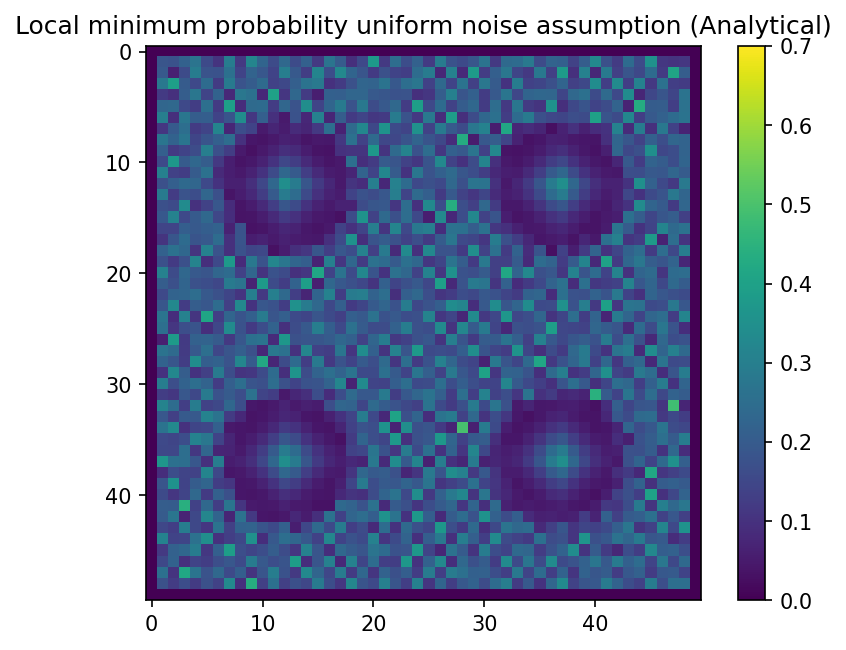

In [25]:
#Visualize local minima probabilities :  Analytical

start = time.time()
uniformLocalMinimumProbabilitiesAnalytical = anlyticalLocalMinimaProbabilityIndependentUniformWithBoundaryNotHandled(ensemble)
end = time.time()
print('Time:', end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability uniform noise assumption (Analytical)')
img2 = plt.imshow(uniformLocalMinimumProbabilitiesAnalytical, vmin=0, vmax=0.7)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesAnalytical, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)


##Visualize difference between analytical and Monte Carlo
#diffImg = np.abs(localMinimumProbabilitiesMonteCarlo - localMinimumProbabilitiesAnalytical)
#print(np.amax(diffImg))
##localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
#plt.figure()
#plt.title('Difference between analytical and Monte Carlo')
#img2 = plt.imshow(diffImg, vmin=0, vmax=1)
##plt.gca().invert_yaxis()
#plt.colorbar(img2)
##plt.contour(localMaximumProbabilitiesMonteCarlo, levels=[0.1], colors='#FFFFFF')
#plt.gcf().set_dpi(150)


#h, w = localMinimumProbabilitiesAnalytical.shape
#for i in range(h):
#    for j in range(w):
#        if diffImg[i,j]>0.15:
#            print('i',i)
#            print('j',j)

debug hist i j 2 1
hist1: [ 5 10 14 15  6]
bin_edges1: [-0.00219868 -0.00129315 -0.00038762  0.0005179   0.00142343  0.00232896]
debug hist i j 2 2
hist1: [15 11 13  9  2]
bin_edges1: [-1.39556914e-03 -6.78624486e-04  3.83201655e-05  7.55264817e-04
  1.47220947e-03  2.18915412e-03]
debug hist i j 2 3
hist1: [10 11  7 13  9]
bin_edges1: [-0.00201686 -0.00122614 -0.00043543  0.00035529  0.00114601  0.00193672]
Time: 43.95448184013367
0.03367438535145109


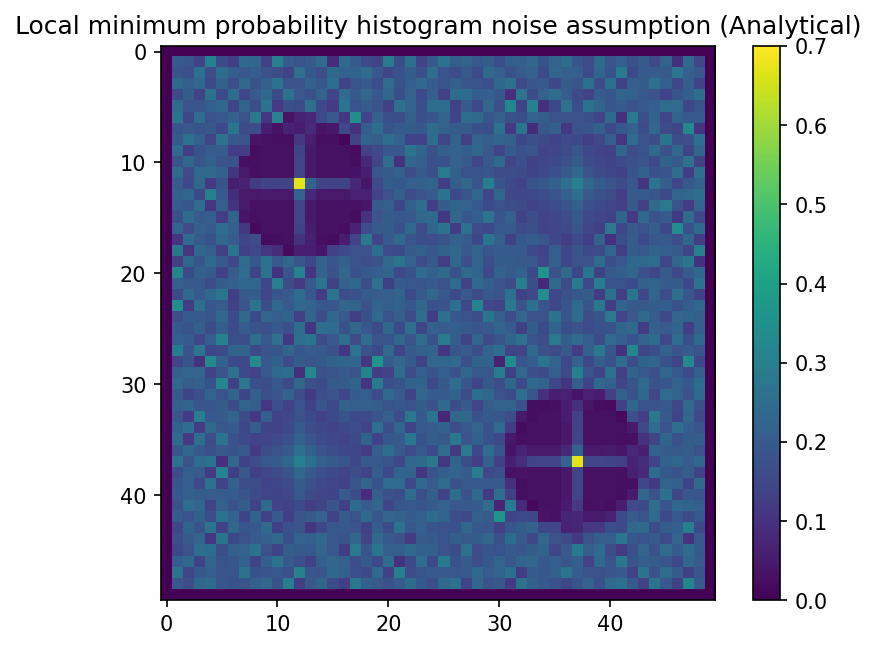

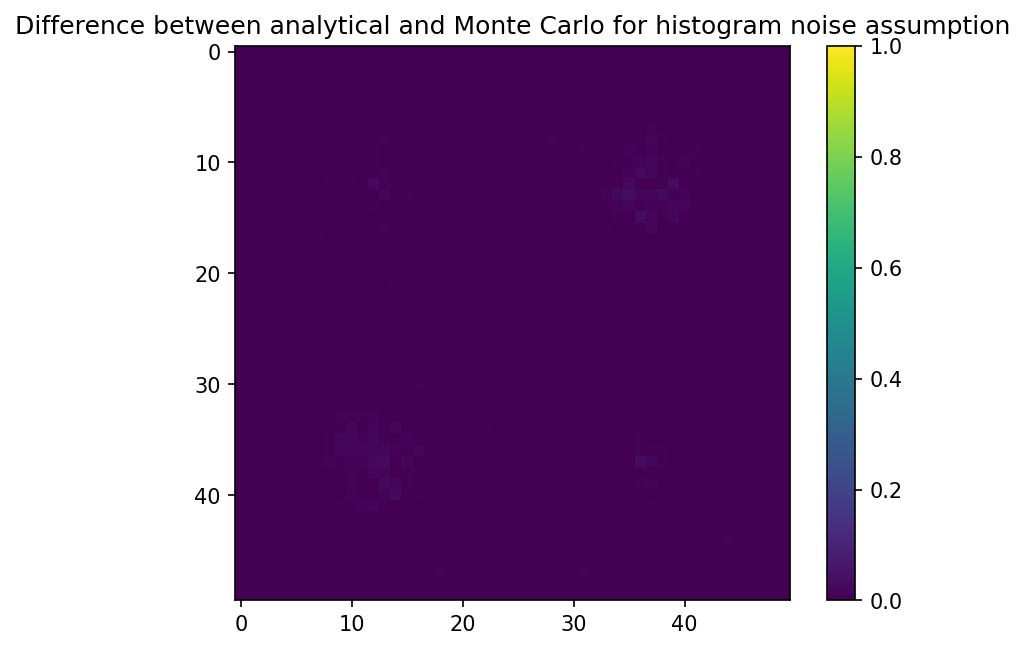

In [29]:
#Visualize local minima probabilities :  Closed form

start = time.time()
numBinsPerHistogram = 5
histogramLocalMinimumProbabilitiesAnalytical = analyticalLocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numBinsPerHistogram)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability histogram noise assumption (Analytical)')
img2 = plt.imshow(histogramLocalMinimumProbabilitiesAnalytical, vmin=0, vmax=0.7)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)


#Visualize difference between analytical and Monte Carlo
diffImg = np.abs(histogramLocalMinimumProbabilitiesMonteCarlo - histogramLocalMinimumProbabilitiesAnalytical)
print(np.amax(diffImg))
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Difference between analytical and Monte Carlo for histogram noise assumption')
img2 = plt.imshow(diffImg, vmin=0, vmax=1)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMaximumProbabilitiesMonteCarlo, levels=[0.1], colors='#FFFFFF')
plt.gcf().set_dpi(150)


#h, w = localMinimumProbabilitiesAnalytical.shape
#for i in range(h):
#    for j in range(w):
#        if diffImg[i,j]>0.15:
#            print('i',i)
#            print('j',j)